In [1]:
! pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /opt/conda/lib/python3.6/site-packages (0.24.2)


In [1]:
import illustris_python as il
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt

In [2]:
from sklearn import metrics
from sklearn.model_selection import cross_validate, KFold, cross_val_predict, GridSearchCV

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.neighbors import KNeighborsRegressor

In [3]:
basePath = '../sims.TNG/TNG100-1/output'

In [4]:
mtype = il.groupcat.loadSubhalos(basePath, 58, fields=['SubhaloMassType'])
gmetal = il.groupcat.loadSubhalos(basePath, 58, fields=['SubhaloGasMetallicity'])
sfr = il.groupcat.loadSubhalos(basePath, 58, fields=['SubhaloSFR'])

In [5]:
sfr.shape

(4939851,)

In [6]:
pdgmetal = pd.DataFrame(gmetal, columns=['Gas Metallicity'])
pdsfr = pd.DataFrame(sfr, columns=['Stellar Formation Rate'])

In [7]:
gmass = mtype[:,0]
dmmass = mtype[:,1]
stmass = mtype[:,4]
bhmass = mtype[:,5]

In [8]:
pdgmass = np.log10((pd.DataFrame(gmass, columns=['Gas Mass']))*(10**10))
pddmmass = np.log10((pd.DataFrame(dmmass, columns=['Dark Matter Mass']))*(10**10))
pdstmass = np.log10((pd.DataFrame(stmass, columns=['Stellar Mass']))*(10**10))
pdbhmass = np.log10((pd.DataFrame(bhmass, columns=['Black Hole Mass']))*(10**10))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


In [9]:
pdgmass

,Gas Mass
0,13.156445
1,11.560683
2,10.910458
3,10.599209
4,9.945186
5,9.804202
6,10.231368
7,7.291365
8,10.381076
9,-inf


In [10]:
df = pd.DataFrame(pdgmetal)
df['Stellar Formation Rate'] = pdsfr
df['Gas Mass'] = pdgmass
df['Stellar Mass'] = pdstmass
df['Black Hole Mass'] = pdbhmass
df['Dark Matter Mass'] = pddmmass

In [11]:
df['Gas Metallicity'] = df['Gas Metallicity'][(df['Gas Metallicity'] != 10**-8) & (~np.isinf(df['Gas Metallicity']))]
df['Stellar Formation Rate'] = df['Stellar Formation Rate'][(df['Stellar Formation Rate'] != 10**-8) & (~np.isinf(df['Stellar Formation Rate']))]
df['Gas Mass'] = df['Gas Mass'][(df['Gas Mass'] != 8) & (~np.isinf(df['Gas Mass']))]
df['Stellar Mass'] = df['Stellar Mass'][(df['Stellar Mass'] != 8) & (~np.isinf(df['Stellar Mass']))]
df['Black Hole Mass'] = df['Black Hole Mass'][(df['Black Hole Mass'] != 8) & (~np.isinf(df['Black Hole Mass']))]
df['Dark Matter Mass'] = df['Dark Matter Mass'][(df['Dark Matter Mass'] != 8) & (~np.isinf(df['Dark Matter Mass']))]

In [12]:
ddf = df.dropna()

In [13]:
Features = ddf[['Gas Metallicity', 'Stellar Formation Rate', 'Gas Mass', 'Stellar Mass', 'Black Hole Mass']]
Target = ddf['Dark Matter Mass']
X_train, X_test, Y_train, Y_test = train_test_split(Features, Target, test_size=0.1)

In [14]:
X_train.shape

(32313, 5)

prediction :  [10.83754736 11.69603797 10.31070351 ... 11.1914182  10.79801146
  9.92545998]
R2 Score :  0.8584441530745499
The mean square value :  0.03835643130073865
The Score :  {'fit_time': array([0.25806403, 0.25732493, 0.25668406, 0.25699115, 0.25392032,
       0.25409937, 0.2583704 ]), 'score_time': array([0.00321722, 0.0030303 , 0.00273991, 0.00262809, 0.00265193,
       0.00306153, 0.00334811]), 'test_score': array([0.86660416, 0.8690709 , 0.87057186, 0.8771978 , 0.87299445,
       0.86977449, 0.86171963]), 'train_score': array([1., 1., 1., 1., 1., 1., 1.])}
Test Score :  0.8697047546759923
Train Score :  1.0
Cross Vaidate prediction :  [13.8803779  12.50052302 12.66138461 ...  9.19793957  9.19092338
 10.10621833]


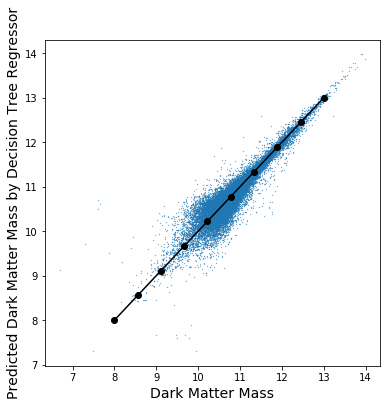

In [15]:
Regressor = DecisionTreeRegressor()
Regressor.fit(X_train, Y_train)
Y_pred = Regressor.predict(X_test)
print ("prediction : ", Y_pred)

R = r2_score(Y_test, Y_pred)
print ("R2 Score : ", R)

Mse = mean_squared_error(Y_test, Y_pred)
print ("The mean square value : ", Mse)

Scores = cross_validate(Regressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10), return_train_score=True)
S = np.mean(Scores['test_score'])
print ("The Score : ", Scores)
print ("Test Score : ", S)
print ("Train Score : ", np.mean(Scores['train_score']))

Cvpred = cross_val_predict(Regressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10))
print ("Cross Vaidate prediction : ", Cvpred)

m = np.linspace(8, 13, 10)
n = m


fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.plot(Target,Cvpred, '.', markersize=0.5)
ax.plot(m, n, color='black', linestyle='-', marker='o')
ax.set_xlabel('Dark Matter Mass', fontsize=14)
ax.set_ylabel('Predicted Dark Matter Mass by Decision Tree Regressor',fontsize=14)
plt.show()

prediction :  [10.83754736 11.69603797 10.24210732 ... 11.29215755 10.79801146
 10.24971031]
R2 Score :  0.8592705908736564
The mean square value :  0.038132497034833984
The Score :  {'fit_time': array([0.25733685, 0.25707626, 0.25652242, 0.25630665, 0.25577617,
       0.25386548, 0.25783992]), 'score_time': array([0.00303125, 0.00278735, 0.00270247, 0.00279832, 0.00277901,
       0.00304031, 0.00282264]), 'test_score': array([0.86739597, 0.86305858, 0.86948344, 0.87926388, 0.87154256,
       0.87074601, 0.86112523]), 'train_score': array([1., 1., 1., 1., 1., 1., 1.])}
Test Score :  0.8689450939634433
Train Score :  1.0
Cross Vaidate prediction :  [13.8803779  12.50052302 12.66138461 ...  9.19793957  9.19092338
  9.73519346]
Pearson Correlation Coefficient: 0.9344691944387379
P-value: 0.0


Text(0,0.5,'Predicted Dark Matter Mass by Decision Tree Regressor')

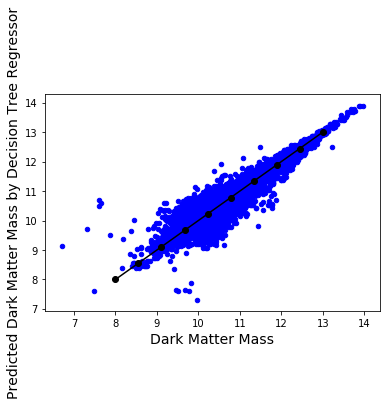

In [16]:
Regressor = DecisionTreeRegressor()
Regressor.fit(X_train, Y_train)
Y_pred = Regressor.predict(X_test)
print ("prediction : ", Y_pred)

R = r2_score(Y_test, Y_pred)
print ("R2 Score : ", R)

Mse = mean_squared_error(Y_test, Y_pred)
print ("The mean square value : ", Mse)

Scores = cross_validate(Regressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10), return_train_score=True)
S = np.mean(Scores['test_score'])
print ("The Score : ", Scores)
print ("Test Score : ", S)
print ("Train Score : ", np.mean(Scores['train_score']))

Cvpred = cross_val_predict(Regressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10))
print ("Cross Vaidate prediction : ", Cvpred)

C_coeff, P_value = stats.pearsonr(Cvpred.reshape((35904,)), Target)
print("Pearson Correlation Coefficient:", C_coeff)
print("P-value:", P_value)

m = np.linspace(8, 13, 10)
n = m
plt.plot(m, n, color='black', linestyle='-', marker='o')

plt.scatter(Target,Cvpred, s = 20, c = 'blue')
plt.xlabel('Dark Matter Mass', fontsize=14)
plt.ylabel('Predicted Dark Matter Mass by Decision Tree Regressor',fontsize=14)

prediction :  [10.82892292 11.57827907 10.3404933  ... 11.24894129 10.88679005
 10.31762114]
R2 Score :  0.8992105622291705
The mean square value :  0.027310232884501545
The Score :  {'fit_time': array([0.07033396, 0.06926918, 0.06983113, 0.06881571, 0.0670917 ,
       0.06862402, 0.06901145]), 'score_time': array([0.0351193 , 0.0352509 , 0.03499722, 0.03504229, 0.03459787,
       0.03494573, 0.03483415]), 'test_score': array([0.90012521, 0.90368215, 0.89998489, 0.89564666, 0.89212618,
       0.89102707, 0.89072821]), 'train_score': array([0.9486072 , 0.94886575, 0.94806038, 0.94962154, 0.95024274,
       0.94978775, 0.94922947])}
Test Score :  0.8961886252116978
Train Score :  0.949202118420499
Cross Vaidate prediction :  [13.01044051 12.52153447 12.46458404 ...  9.0466956   9.33333817
  9.81063105]
Pearson Correlation Coefficient: 0.9467105334396814
P-value: 0.0


Text(0,0.5,'Predicted Dark Matter Mass by KNN Regressor')

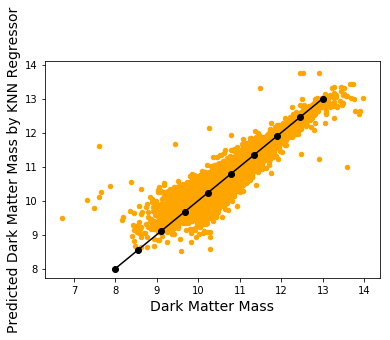

In [17]:
KnnRegressor = KNeighborsRegressor(n_neighbors=3)
KnnRegressor.fit(X_train, Y_train)
KY_pred = KnnRegressor.predict(X_test)
print ("prediction : ", KY_pred)

KR = r2_score(Y_test, KY_pred)
print ("R2 Score : ", KR)

KMse = mean_squared_error(Y_test, KY_pred)
print ("The mean square value : ", KMse)

KScores = cross_validate(KnnRegressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10), return_train_score=True)
KS = np.mean(KScores['test_score'])
print ("The Score : ", KScores)
print ("Test Score : ", KS)
print ("Train Score : ", np.mean(KScores['train_score']))

KCvpred = cross_val_predict(KnnRegressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10))
print ("Cross Vaidate prediction : ", KCvpred)

KC_coeff, KP_value = stats.pearsonr(KCvpred.reshape((35904,)), Target)
print("Pearson Correlation Coefficient:", KC_coeff)
print("P-value:", KP_value)

m = np.linspace(8, 13, 10)
n = m
plt.plot(m, n, color='black', linestyle='-', marker='o')

plt.scatter(Target,KCvpred, s = 20, c = 'orange')
plt.xlabel('Dark Matter Mass', fontsize=14)
plt.ylabel('Predicted Dark Matter Mass by KNN Regressor',fontsize=14)

prediction :  [10.75814722 11.61597407 10.34529218 ... 11.23439485 10.90544238
 10.59524668]
R2 Score :  0.86675094387207
The mean square value :  0.036105596330124654
The Score :  {'fit_time': array([0.03662801, 0.01069665, 0.00868082, 0.00876331, 0.00879312,
       0.00879979, 0.00870347]), 'score_time': array([0.00364447, 0.00286889, 0.00292516, 0.00289106, 0.00425267,
       0.00357842, 0.00283933]), 'test_score': array([0.85105531, 0.86296033, 0.85620345, 0.8646324 , 0.87296566,
       0.85038006, 0.86181046]), 'train_score': array([0.86211594, 0.86020832, 0.8612438 , 0.85994391, 0.85828946,
       0.8622876 , 0.86040451])}
Test Score :  0.8600010964225973
Train Score :  0.8606419345580374
Cross Vaidate prediction :  [11.95122941 12.32523202 12.30777236 ...  9.36773748  9.5648834
 10.03952669]
Pearson Correlation Coefficient: 0.92747053374168
P-value: 0.0


Text(0,0.5,'Predicted Dark Matter Mass by Linear Regressor')

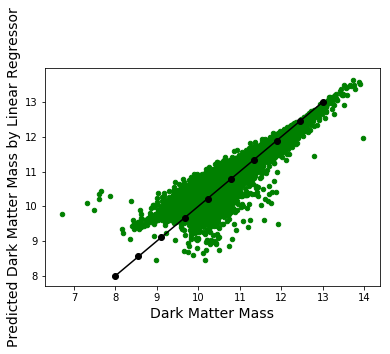

In [18]:
LRegressor = LinearRegression()
LRegressor.fit(X_train, Y_train)
LY_pred = LRegressor.predict(X_test)
print ("prediction : ", LY_pred)

LR = r2_score(Y_test, LY_pred)
print ("R2 Score : ", LR)

LMse = mean_squared_error(Y_test, LY_pred)
print ("The mean square value : ", LMse)

LScores = cross_validate(LRegressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10), return_train_score=True)
LS = np.mean(LScores['test_score'])
print ("The Score : ", LScores)
print ("Test Score : ", LS)
print ("Train Score : ", np.mean(LScores['train_score']))

LCvpred = cross_val_predict(LRegressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10))
print ("Cross Vaidate prediction : ", LCvpred)

LC_coeff, LP_value = stats.pearsonr(LCvpred.reshape((35904,)), Target)
print("Pearson Correlation Coefficient:", LC_coeff)
print("P-value:", LP_value)

m = np.linspace(8, 13, 10)
n = m
plt.plot(m, n, color='black', linestyle='-', marker='o')

plt.scatter(Target,LCvpred, s = 20, c = 'green')
plt.xlabel('Dark Matter Mass', fontsize=14)
plt.ylabel('Predicted Dark Matter Mass by Linear Regressor',fontsize=14)

prediction :  [10.83082587 11.61018698 10.24960509 ... 11.24662038 10.9080891
 10.40983682]
R2 Score :  0.9267572041193225
The mean square value :  0.01984610547348678
The Score :  {'fit_time': array([15.34240007, 15.23946261, 15.37166476, 15.25465679, 15.19063759,
       15.32121587, 15.20979452]), 'score_time': array([0.22775078, 0.16601038, 0.18833995, 0.16263986, 0.20253158,
       0.16465664, 0.16294026]), 'test_score': array([0.93461821, 0.93296237, 0.93597701, 0.92840125, 0.9337147 ,
       0.92950158, 0.92954622]), 'train_score': array([0.99036859, 0.99051493, 0.99031748, 0.99070456, 0.99060053,
       0.99073619, 0.99048599])}
Test Score :  0.9321030485574804
Train Score :  0.9905326076287848
Cross Vaidate prediction :  [13.84798623 12.57594122 12.40659309 ...  9.463811    9.50859359
  9.79120067]
Pearson Correlation Coefficient: 0.9653601604484447
P-value: 0.0


Text(0,0.5,'Predicted Dark Matter Mass by Random Forest Regressor')

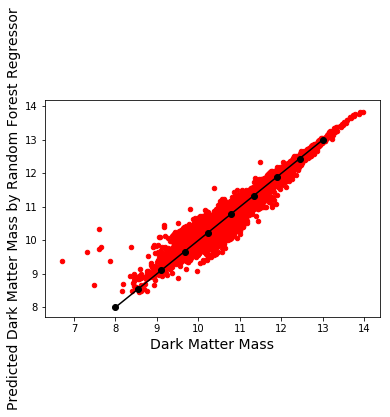

In [19]:
FORegressor = RandomForestRegressor()
FORegressor.fit(X_train, Y_train)
FOY_pred = FORegressor.predict(X_test)
print ("prediction : ", FOY_pred)

FOR = r2_score(Y_test, FOY_pred)
print ("R2 Score : ", FOR)

FOMse = mean_squared_error(Y_test, FOY_pred)
print ("The mean square value : ", FOMse)

FOScores = cross_validate(FORegressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10), return_train_score=True)
FOS = np.mean(FOScores['test_score'])
print ("The Score : ", FOScores)
print ("Test Score : ", FOS)
print ("Train Score : ", np.mean(FOScores['train_score']))

FOCvpred = cross_val_predict(FORegressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10))
print ("Cross Vaidate prediction : ", FOCvpred)

FC_coeff, FP_value = stats.pearsonr(FOCvpred.reshape((35904,)), Target)
print("Pearson Correlation Coefficient:", FC_coeff)
print("P-value:", FP_value)

m = np.linspace(8, 13, 10)
n = m
plt.plot(m, n, color='black', linestyle='-', marker='o')

plt.scatter(Target,FOCvpred, s = 20, c = 'red')
plt.xlabel('Dark Matter Mass', fontsize=14)
plt.ylabel('Predicted Dark Matter Mass by Random Forest Regressor',fontsize=14)

prediction :  [10.81789541 11.59182804 10.30435382 ... 11.23737785 10.90313097
 10.38274347]
R2 Score :  0.9279721710941937
The mean square value :  0.019516894082247983
The Score :  {'fit_time': array([5.10614729, 5.0647161 , 5.13828063, 5.14231205, 5.06076908,
       5.0639236 , 5.09392953]), 'score_time': array([0.27715635, 0.19659591, 0.21908331, 0.20976806, 0.19775343,
       0.19586182, 0.20152187]), 'test_score': array([0.93551019, 0.93272193, 0.93633385, 0.92631935, 0.93513767,
       0.92784532, 0.93038349]), 'train_score': array([1., 1., 1., 1., 1., 1., 1.])}
Test Score :  0.9320359716917478
Train Score :  1.0
Cross Vaidate prediction :  [13.81196178 12.56355711 12.47265624 ...  9.44087676  9.5555571
  9.70597912]
Pearson Correlation Coefficient: 0.9654568167356413
P-value: 0.0


Text(0,0.5,'Predicted Dark Matter Mass by Extreme Random Forest Regressor')

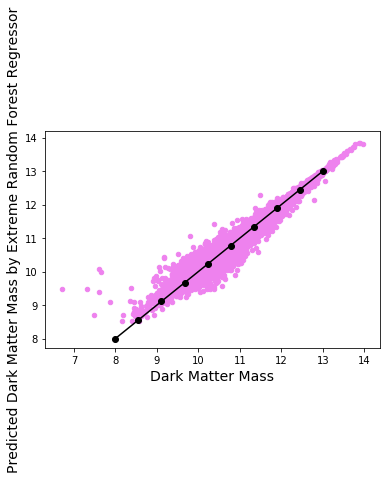

In [20]:
ETRegressor = ExtraTreesRegressor(n_estimators=100, random_state=33)
ETRegressor.fit(X_train, Y_train)
ETY_pred = ETRegressor.predict(X_test)
print ("prediction : ", ETY_pred)

ETR = r2_score(Y_test, ETY_pred)
print ("R2 Score : ", ETR)

ETMse = mean_squared_error(Y_test, ETY_pred)
print ("The mean square value : ", ETMse)

ETScores = cross_validate(ETRegressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10), return_train_score=True)
ETS = np.mean(ETScores['test_score'])
print ("The Score : ", ETScores)
print ("Test Score : ", ETS)
print ("Train Score : ", np.mean(ETScores['train_score']))

ETCvpred = cross_val_predict(ETRegressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10))
print ("Cross Vaidate prediction : ", ETCvpred)

ETC_coeff, ETP_value = stats.pearsonr(ETCvpred.reshape((35904,)), Target)
print("Pearson Correlation Coefficient:", ETC_coeff)
print("P-value:", ETP_value)

m = np.linspace(8, 13, 10)
n = m
plt.plot(m, n, color='black', linestyle='-', marker='o')

plt.scatter(Target,ETCvpred, s = 20, c = 'violet')
plt.xlabel('Dark Matter Mass', fontsize=14)
plt.ylabel('Predicted Dark Matter Mass by Extreme Random Forest Regressor',fontsize=14)

 Model Comparisons for Case 2 


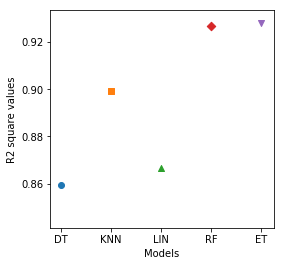

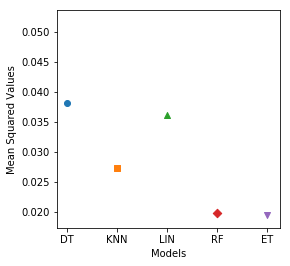

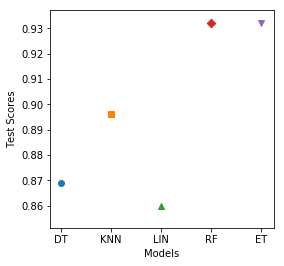

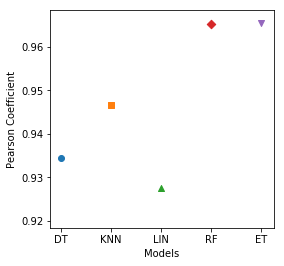

In [22]:
# COMPARISON GRAPH (CASE 2)

print ("\033[1m Model Comparisons for Case 2 \033[0m")

#R square
plt.figure(figsize=(4, 4))
g = [R, KR, LR, FOR, ETR]
h = ['DT', 'KNN', 'LIN', 'RF', 'ET']
shapes = ['o', 's', '^', 'D', 'v']
for i in range(len(g)):
    plt.scatter(h[i], g[i], marker=shapes[i])
plt.xlabel('Models')
plt.ylabel('R2 square values')
plt.show()

#Mean Squared Error

plt.figure(figsize=(4, 4))
gg = [Mse, KMse, LMse, FOMse, ETMse]
hh = ['DT', 'KNN', 'LIN', 'RF', 'ET']
shapes = ['o', 's', '^', 'D', 'v']
for i in range(len(gg)):
    plt.scatter(hh[i], gg[i], marker=shapes[i])
plt.xlabel('Models')
plt.ylabel('Mean Squared Values')
plt.show()

#Test Scores

plt.figure(figsize=(4, 4))
G = [S, KS, LS, FOS, ETS]
H = ['DT', 'KNN', 'LIN', 'RF', 'ET']
shapes = ['o', 's', '^', 'D', 'v']
for j in range(len(G)):
    plt.scatter(H[j], G[j], marker=shapes[j])
plt.xlabel('Models')
plt.ylabel('Test Scores')
plt.show()

#Pearson Correlation

plt.figure(figsize=(4, 4))
G = [C_coeff, KC_coeff, LC_coeff, FC_coeff, ETC_coeff]
H = ['DT', 'KNN', 'LIN', 'RF', 'ET']
shapes = ['o', 's', '^', 'D', 'v']
for j in range(len(G)):
    plt.scatter(H[j], G[j], marker=shapes[j])
plt.xlabel('Models')
plt.ylabel('Pearson Coefficient')
plt.show()